# Analysis of Sars_CoV_2 Pangolin Lineages found over time

In [429]:
import mitosheet as mt
import pandas as pd
import glob
from scipy.interpolate import interp1d
#from pandasgui import show
#from pandasgui.datasets import all_datasets
import numpy as np
import matplotlib.pyplot as plt

In [430]:
path = r'/home/kibet/bioinformatics/github/covid/data/variants'
all_files = glob.glob(path + "/*.tsv")
#print(all_files)
data=[]
for filename in all_files:
    #df = pd.read_csv(StringIO(temp), parse_dates=['Date'])
    df = pd.read_csv(filename, sep='\t', index_col=None, header=0,
                     parse_dates=['Lab_confirmation_date'], infer_datetime_format=True)
    data.append(df)
df_data = pd.concat(data, axis=0, ignore_index=True)
#df_data.index = pd.to_numeric(df_data["Unnamed_0"])
#df_data
mt.sheet(df_data)

MitoWidget(analysis_name='UUID-4b455619-2585-4823-a2d1-11f2e121bf60', code_json='{"imports": "from mitosheet i…

In [431]:
df_lin = df_data.filter(['Unnamed_0','Lab_confirmation_date', 'Lineage'])
df_lin01 = df_lin.groupby(["Lab_confirmation_date", "Lineage"])["Unnamed_0"].count().reset_index(name="count")
mt.sheet(df_lin01)

MitoWidget(analysis_name='UUID-6b09a6fe-223c-4640-924f-44d641c921bc', code_json='{"imports": "from mitosheet i…

In [432]:
df_lin02 = df_lin01.pivot(index='Lab_confirmation_date', columns='Lineage')
print(df_lin02)
df_lin03 = df_lin02.fillna(0)
#df_lin03 = df_lin02[["count"]].resample('1W')
df_lin03
#print(df_lin03)

                      count                                                 \
Lineage                A.23 A.23.1   B.1 B.1.1.171 B.1.1.7 B.1.143 B.1.343   
Lab_confirmation_date                                                        
2020-11-13              NaN    NaN  12.0       1.0     NaN     NaN     1.0   
2020-11-16              NaN    NaN   2.0       NaN     NaN     1.0     NaN   
2021-02-09              NaN    NaN   NaN       NaN     2.0     NaN     NaN   
2021-02-13              NaN    NaN   NaN       NaN     NaN     NaN     NaN   
2021-02-17              NaN    NaN   1.0       NaN     1.0     NaN     NaN   
2021-02-18              NaN    NaN   NaN       NaN     1.0     NaN     NaN   
2021-02-19              NaN    NaN   NaN       NaN     2.0     NaN     NaN   
2021-02-22              NaN    1.0   NaN       NaN     3.0     NaN     NaN   
2021-02-24              NaN    1.0   NaN       NaN     1.0     NaN     NaN   
2021-03-02              1.0    NaN   NaN       NaN     8.0     N

count                                                 \
Lineage                A.23 A.23.1   B.1 B.1.1.171 B.1.1.7 B.1.143 B.1.343   
Lab_confirmation_date                                                        
2020-11-13              0.0    0.0  12.0       1.0     0.0     0.0     1.0   
2020-11-16              0.0    0.0   2.0       0.0     0.0     1.0     0.0   
2021-02-09              0.0    0.0   0.0       0.0     2.0     0.0     0.0   
2021-02-13              0.0    0.0   0.0       0.0     0.0     0.0     0.0   
2021-02-17              0.0    0.0   1.0       0.0     1.0     0.0     0.0   
2021-02-18              0.0    0.0   0.0       0.0     1.0     0.0     0.0   
2021-02-19              0.0    0.0   0.0       0.0     2.0     0.0     0.0   
2021-02-22              0.0    1.0   0.0       0.0     3.0     0.0     0.0   
2021-02-24              0.0    1.0   0.0       0.0     1.0     0.0     0.0   
2021-03-02              1.0    0.0   0.0       0.0     8.0     0.0     0.0   
2021-04-01              0.0    1.0   0.0       0.0     3.0     0.0     0.0   
2021-04-07              0.0    0.0   0.0       0.0     1.0     0.0     0.0   
2021-04-08              0.0    0.0   0.0       0.0     1.0     0.0     0.0   

                                                                 
Lineage               B.1.351 B.1.525 B.1.530 B.1.549 B.1.596.1  
Lab_confirmation_date                                            
2020-11-13                0.0     0.0     2.0     2.0       0.0  
2020-11-16                0.0     0.0     0.0     1.0       1.0  
2021-02-09                0.0     0.0     0.0     0.0       0.0  
2021-02-13                1.0     1.0     0.0     0.0       0.0  
2021-02-17                0.0     0.0     0.0     0.0       0.0  
2021-02-18                0.0     0.0     0.0     0.0       0.0  
2021-02-19                0.0     1.0     0.0     0.0       0.0  
2021-02-22                0.0     0.0     0.0     0.0       0.0  
2021-02-24                0.0     1.0     0.0     0.0       0.0  
2021-03-02                1.0     2.0     0.0     0.0       0.0  
2021-04-01                0.0     0.0     1.0     0.0       0.0  
2021-04-07                0.0     0.0     0.0     0.0       0.0  
2021-04-08                0.0     0.0     0.0     0.0       0.0

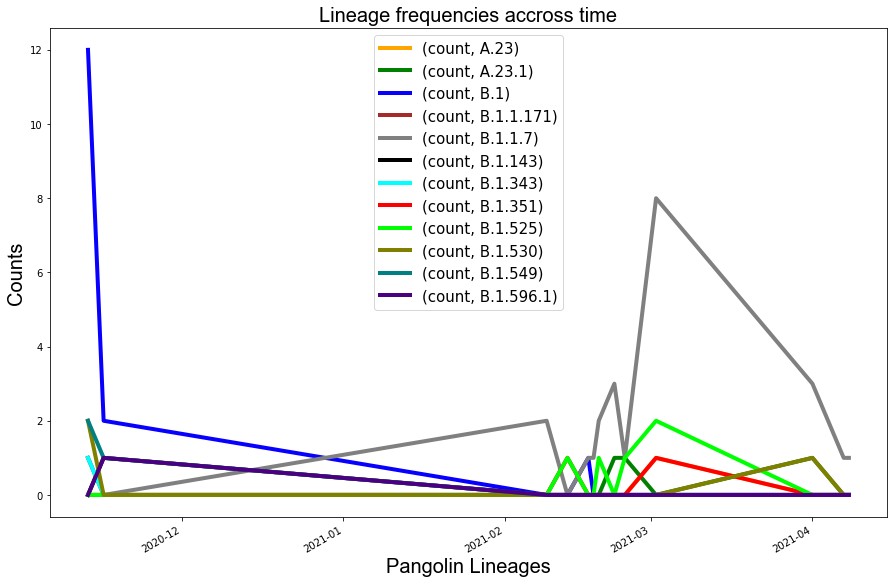

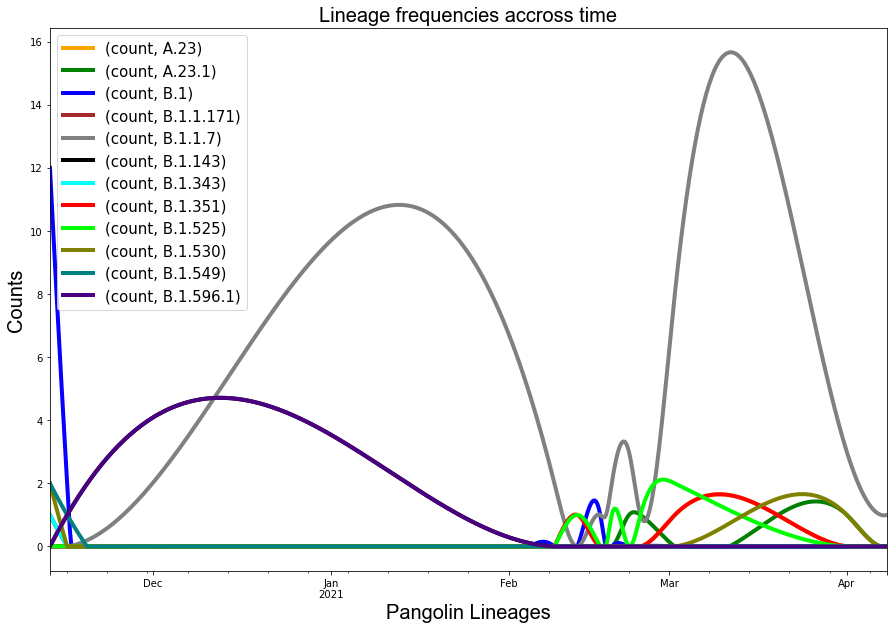

In [433]:
colors = ['#FFA500','#008000','#0800FF','#A52A2A','#808080','#000000','#00FFFF','#FF0000','#00FF00',
          '#808000','#008080','#4B0082','#00FFFF']
#colors = [cm.rainbow(Lineage) for x in evenly_spaced_interval]
pangolin_plot=df_lin03.plot(figsize=(15,10),linewidth=4,color=colors)
font1 = {'family':'Arial','color':'black','size':20,'fontweight':50}
plt.ylabel("Counts", fontdict = font1)
plt.xlabel("Pangolin Lineages", fontdict = font1)
plt.title("Lineage frequencies accross time", fontdict = font1)
plt.legend(title=None,fontsize=15)
plt.savefig('/home/kibet/bioinformatics/github/covid/data/variants/pangolin_lineages_plot.jpg', dpi=95, )
df_lin04=df_lin03[["count"]].resample("6H").interpolate(method='cubic').clip(0,20)
#print(df_lin04)
pangolin_smooth=df_lin04.plot(figsize=(15,10),linewidth=4,color=colors)
plt.ylabel("Counts", fontdict = font1)
plt.xlabel("Pangolin Lineages", fontdict = font1)
plt.title("Lineage frequencies accross time", fontdict = font1)
plt.legend(title=None,fontsize=15)
plt.savefig('/home/kibet/bioinformatics/github/covid/data/variants/pangolin_lineages_plot_smooth.jpg', dpi=95)

In [376]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f